# Developing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reservoir_simulator import ReservoirSim 
from oldrs import ReservoirSim as ORS

%load_ext autoreload
%autoreload 2   
%load_ext line_profiler

# Random number generator
rng = np.random.default_rng()

In [2]:
nx = ny = 50
nt, dt = 10, 0.0001
perm_field = rng.normal(size=nx*ny).reshape(nx, ny)*10 + 100
wells = ([1, 2, 180], [20, 10, 120], [40, 33, 200], [10, 45, 120], [30, 20, 80])
RSim = ReservoirSim(perm_field, wells=None)
ph = RSim(nt, dt)
np.allclose(ORS(perm_field)(nt, dt), ph)

True

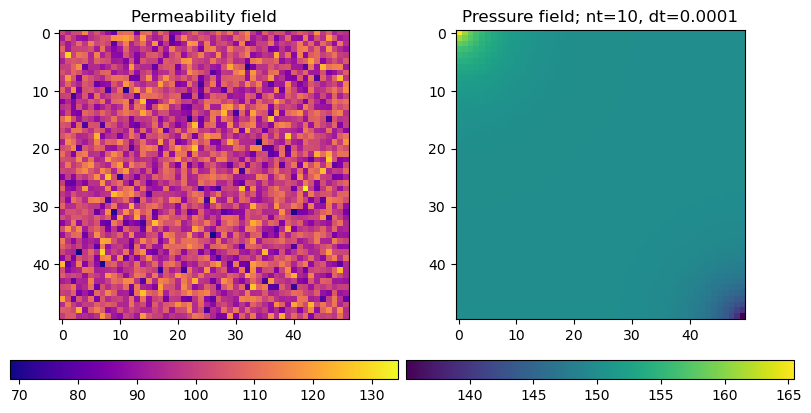

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharex=True, constrained_layout=True)

axs[0].set_title("Permeability field")
i1 = axs[0].imshow(perm_field, cmap='plasma', aspect='equal')
plt.colorbar(i1, ax=axs[0], orientation='horizontal')

axs[1].set_title(f"Pressure field; nt={nt}, dt={dt}")
i2 = axs[1].imshow(ph[nt, :, :], aspect='equal')
plt.colorbar(i2, ax=axs[1], orientation='horizontal')

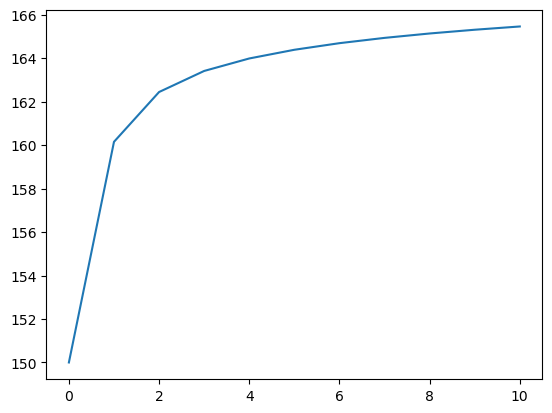

In [4]:
plt.plot(ph[:, 0, 0])

# Timing

In [5]:
%timeit RSim()

35.6 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%lprun -f ReservoirSim.__call__ -f ReservoirSim.solve RSim()

Timer unit: 1e-09 s

Total time: 0.0380945 s
File: /home/dtr/Codes/DA-EM-CCS/notebooks/reservoir_simulator.py
Function: solve at line 76

Line #      Hits         Time  Per Hit   % Time  Line Contents
    76                                               def solve(self, compr, p):
    77                                                   """Construct K-matrix."""
    78                                           
    79                                                   # Mobility ratio without permeability
    80        10     333114.0  33311.4      0.9          phi = self.rho0 * (1 + self.c_f * (p - self.p0)) / self.mu_w
    81                                           
    82                                                   # Pre-allocate diagonals.
    83        10      21343.0   2134.3      0.1          mn = np.zeros(self.size)
    84        10      11330.0   1133.0      0.0          m1 = np.zeros(self.size)
    85        10      24354.0   2435.4      0.1          d = compr.copy()
  